In [1]:
import tensorflow as tf
import keras
from keras.layers import Dense , Conv2D , MaxPooling2D , GlobalAveragePooling2D , Dropout , Flatten , BatchNormalization
from keras.optimizers import Adam 
import matplotlib.pyplot as plt

In [2]:
img_size = 128
batch_size = 16
epochs = 10
lr = 0.0001

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="C:\\Movies\\asl_alphabet_train",
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="C:\\Movies\\asl_alphabet_train",
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

# test_dataset = tf.keras.utils.image_dataset_from_directory(
#     directory="C:\\Movies\\asl_alphabet_test",
#     image_size=(img_size, img_size),
#     batch_size=batch_size
# )


Found 87000 files belonging to 29 classes.
Using 78300 files for training.
Found 87000 files belonging to 29 classes.
Using 8700 files for validation.


In [4]:
class_names = train_dataset.class_names
num_classes = len(class_names)
print(class_names)
print(num_classes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
29


In [5]:
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [6]:
model = keras.Sequential()

model.add(Conv2D(2, (3, 3), padding='same', activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(4, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=lr),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 2)       56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 2)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 4)         76        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 4)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         296       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)        0

In [7]:
history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset)

Epoch 1/10
4894/4894 [==============================] - 83s 14ms/step - loss: 1.9253 - accuracy: 0.4361 - val_loss: 1.1512 - val_accuracy: 0.6436
Epoch 2/10
4894/4894 [==============================] - 75s 15ms/step - loss: 0.8689 - accuracy: 0.7327 - val_loss: 0.6622 - val_accuracy: 0.7976
Epoch 3/10
4894/4894 [==============================] - 49s 10ms/step - loss: 0.5246 - accuracy: 0.8374 - val_loss: 0.4276 - val_accuracy: 0.8641
Epoch 4/10
4894/4894 [==============================] - 46s 9ms/step - loss: 0.3470 - accuracy: 0.8912 - val_loss: 0.2882 - val_accuracy: 0.9116
Epoch 5/10
4894/4894 [==============================] - 59s 12ms/step - loss: 0.2433 - accuracy: 0.9241 - val_loss: 0.2024 - val_accuracy: 0.9374
Epoch 6/10
4894/4894 [==============================] - 52s 11ms/step - loss: 0.1772 - accuracy: 0.9448 - val_loss: 0.1663 - val_accuracy: 0.9489
Epoch 7/10
4894/4894 [==============================] - 47s 10ms/step - loss: 0.1354 - accuracy: 0.9579 - val_loss: 0.1164 - 

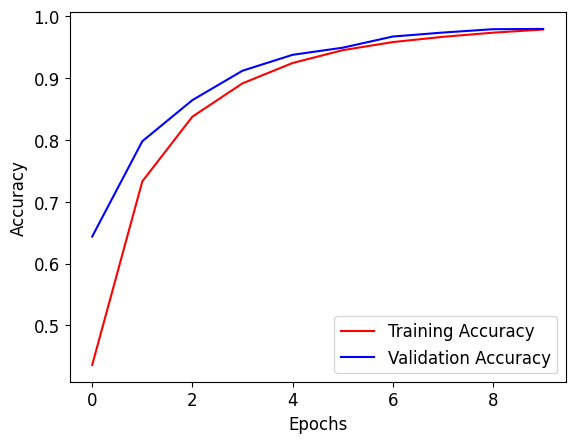

In [8]:
plt.rcParams.update({'font.size': 12})
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

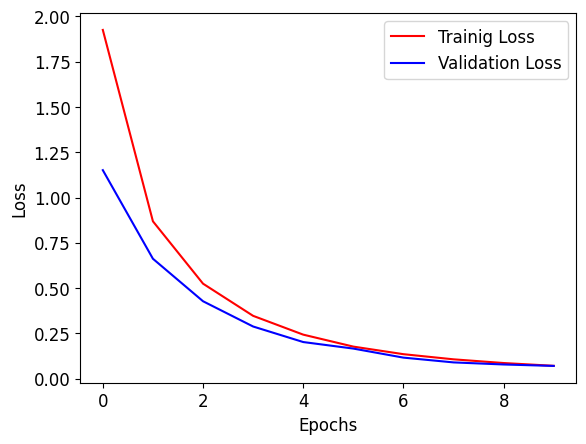

In [9]:
plt.rcParams.update({'font.size': 12})
plt.plot(history.history['loss'], color='red', label='Trainig Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
model.save("C:\\Code_EveryThing\\Git_Project\\SignLanguageMnist\\model.h5")